## 2º Análise Exploratória de Dados de Vendas

Com o mesmo dataset simulado da tarefa anterior, crie visualizações/gráficos e com eles:

-  Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.
- Identifique e descreva pelo menos dois padrões ou insights interessantes que você observou nos dados.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
vendas = pd.read_csv("data_clean.csv")
vendas.head()

,ID,Data,Produto,Categoria,Quantidade,Preco
0,1,2023-04-19,Notebook,Eletronicos,2,2500.0
1,2,2023-03-04,Fone de Ouvido,Eletronicos,10,150.0
2,3,2023-02-10,Celular,Eletronicos,5,1200.0
3,4,2023-01-07,Notebook,Eletronicos,5,2500.0
4,5,2023-12-19,Tênis,Vestuário,10,250.0


In [29]:
# Preparando os dados
vendas["Data"] = pd.to_datetime(vendas["Data"])
vendas["Total"] = vendas["Quantidade"] * vendas["Preco"]
vendas["Mes"] = vendas["Data"].dt.month

In [30]:
# Soma por mês
total_mes = vendas.groupby("Mes")["Total"].sum()
print(total_mes)

Mes
1     26529.166667
2      6410.000000
3      5500.000000
4     11089.166667
5      5210.000000
6      7250.000000
7     19510.000000
8       890.000000
9      7080.000000
10     2540.000000
11    28310.000000
12    29300.000000
Name: Total, dtype: float64


In [31]:
# Calculando algumas métricas
media = total_mes.mean()
mes_pior = total_mes.idxmin()
mes_melhor = total_mes.idxmax()
mes_acima_media = sum(total_mes > media)
mes_abaixo_media = sum(total_mes <= media)

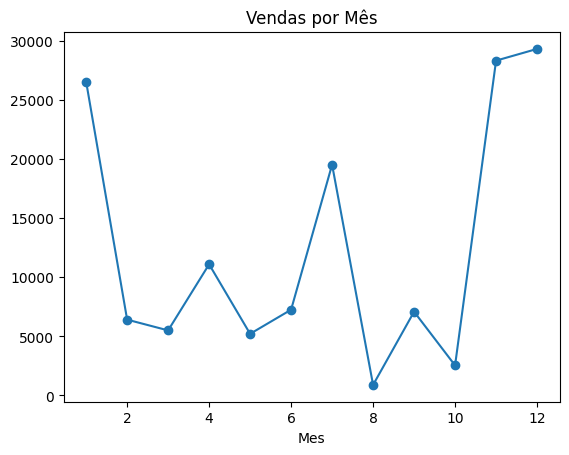


PADRÕES

1. Mínimo e Máximo
   Analisando o gráfico, podemos observar que o mês 12 obteve o melhor resultado (R$ 29,300.00), 
   enquanto o mês 8 teve o pior desempenho (R$ 890.00).

2. Análise da Média
   Calculando os 12 meses, chegamos à média mensal de R$ 12,468.19.
   Tivemos 4 meses com vendas acima da média e 8 meses abaixo.


In [32]:
# Gerando o gráfico
total_mes.plot(marker="o")
plt.title("Vendas por Mês")
plt.show()

print("\nPADRÕES\n")

print(f"1. Mínimo e Máximo")
print(f"   Analisando o gráfico, podemos observar que o mês {mes_melhor} obteve o melhor resultado (R$ {total_mes.max():,.2f}), ")
print(f"   enquanto o mês {mes_pior} teve o pior desempenho (R$ {total_mes.min():,.2f}).")
print()

print(f"2. Análise da Média")
print(f"   Calculando os 12 meses, chegamos à média mensal de R$ {media:,.2f}.")
print(f"   Tivemos {mes_acima_media} meses com vendas acima da média e {mes_abaixo_media} meses abaixo.")